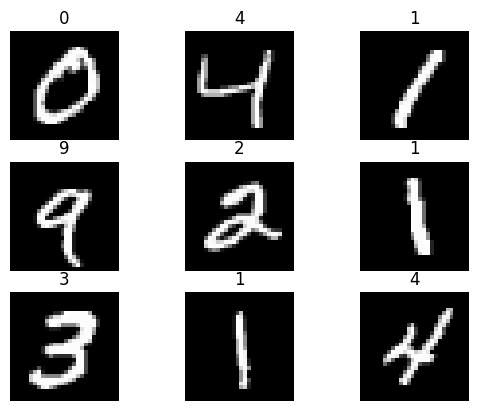

In [1]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.title(y_train[i])
    plt.axis("off")

    plt.imshow(x_train[i], cmap="gray")

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

# reshape the datast
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 60000
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  # 10000
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

x_train.shape, x_test.shape, x_val.shape

((54000, 28, 28, 1), (10000, 28, 28, 1), (6000, 28, 28, 1))

In [3]:
# one hot encode the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [4]:
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, Flatten, Conv2D

inputs = Input(shape=(28, 28, 1))
x = Conv2D(
    filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(inputs)
x = MaxPooling2D()(x)
x = Conv2D(
    filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs, outputs, name="Normal_model")
aug_model = Model(inputs,outputs,name="Aug_Model")
model.summary()



Model: "Normal_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)           

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_val,y_val),
    batch_size=64,
    # callbacks=[EarlyStopping("val_loss", patience=5)],
)


Epoch 1/20


844/844 [==============================] - 28s 31ms/step - loss: 0.5539 - accuracy: 0.9015 - val_loss: 0.1022 - val_accuracy: 0.9702
Epoch 2/20
844/844 [==============================] - 21s 24ms/step - loss: 0.0702 - accuracy: 0.9778 - val_loss: 0.0910 - val_accuracy: 0.9732
Epoch 3/20
844/844 [==============================] - 18s 22ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0604 - val_accuracy: 0.9825
Epoch 4/20
844/844 [==============================] - 18s 21ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0861 - val_accuracy: 0.9770
Epoch 5/20
844/844 [==============================] - 18s 21ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0519 - val_accuracy: 0.9843
Epoch 6/20
844/844 [==============================] - 18s 21ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0577 - val_accuracy: 0.9862
Epoch 7/20
844/844 [==============================] - 18s 21ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0671 - val_accura

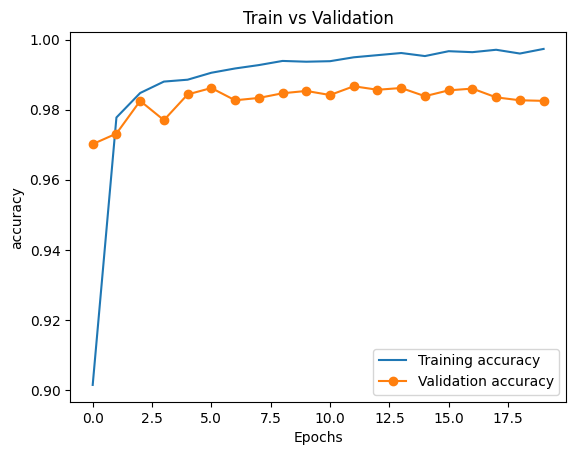

In [7]:
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy", marker="o")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

In [8]:
model_1_score = model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0845 - accuracy: 0.9857


In [9]:
aug_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)
aug_model.summary()

Model: "Aug_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.1,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip = True,
    vertical_flip = False
)
datagen.fit(x_train)

10000
20000
2


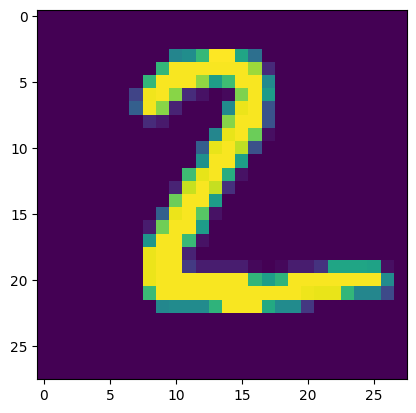

In [11]:
aug_data_gen = datagen
train_generator = aug_data_gen.flow(x_train, y_train, batch_size=10)
test_generator = aug_data_gen.flow(x_test, y_test, batch_size=10)

X_train_augmented = []
Y_train_augmented = []

X_test_augmented = []
Y_test_augmented = []

num_of_sample = 6000
for i in range(num_of_sample):
    images, labels = next(train_generator)
    X_train_augmented.append(images)
    Y_train_augmented.append(labels)
    
num_of_sample = 1000
for i in range(num_of_sample):
    test_images, test_labels = next(test_generator)
    X_test_augmented.append(test_images)
    Y_test_augmented.append(test_labels)


X_train_augmented = np.concatenate(X_train_augmented)
Y_train_augmented = np.concatenate(Y_train_augmented)
X_test_augmented = np.concatenate(X_test_augmented)
Y_test_augmented = np.concatenate(Y_test_augmented)

X_train_augmented = np.concatenate((x_train,X_train_augmented),axis=0)
Y_train_augmented = np.concatenate((y_train,Y_train_augmented),axis=0)
X_test_augmented = np.concatenate((x_test,X_test_augmented),axis=0)
Y_test_augmented = np.concatenate((y_test,Y_test_augmented),axis=0)


print(len(x_test))
print(len(X_test_augmented))
plt.imshow(X_test_augmented[1])
print(np.argmax(Y_test_augmented[1]))

In [12]:
model_2_score = model.evaluate(X_test_augmented,Y_test_augmented)

625/625 [==============================] - 3s 5ms/step - loss: 3.9092 - accuracy: 0.7279


In [13]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of images to display
# num_images_to_display = 10

# # Creating an iterator to augment images from x_train
# image_gen = datagen.flow(x_train, batch_size=32)

# # Plot the augmented images
# plt.figure(figsize=(10, 10))

# for i in range(num_images_to_display):
#     # Get a batch of images (in this case, one image at a time)
#     augmented_image = next(image_gen)[0]

#     # Plotting the augmented image
#     plt.subplot(1, num_images_to_display, i + 1)
#     plt.imshow(augmented_image, cmap="gray")
#     plt.axis("off")

# # Display the plot
# plt.show()

In [14]:
aug_history = aug_model.fit(
    X_train_augmented,
    Y_train_augmented,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    # callbacks=[EarlyStopping("val_loss", patience=5)],
)

Epoch 1/20
1782/1782 [==============================] - 40s 22ms/step - loss: 0.2526 - accuracy: 0.9267 - val_loss: 0.0598 - val_accuracy: 0.9832
Epoch 2/20
1782/1782 [==============================] - 37s 21ms/step - loss: 0.0816 - accuracy: 0.9746 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 3/20
1782/1782 [==============================] - 36s 20ms/step - loss: 0.0535 - accuracy: 0.9827 - val_loss: 0.0494 - val_accuracy: 0.9870
Epoch 4/20
1782/1782 [==============================] - 36s 20ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0731 - val_accuracy: 0.9853
Epoch 5/20
1782/1782 [==============================] - 35s 20ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0717 - val_accuracy: 0.9840
Epoch 6/20
1782/1782 [==============================] - 36s 20ms/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0907 - val_accuracy: 0.9838
Epoch 7/20
1782/1782 [==============================] - 36s 20ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0724 -

In [15]:
model_3_score = aug_model.evaluate(x_test,y_test)
model_4_score = aug_model.evaluate(X_test_augmented,Y_test_augmented)

625/625 [==============================] - 4s 6ms/step - loss: 0.2567 - accuracy: 0.9732


In [16]:
print("NO AUG--NO AUG TEST:",model_1_score)
print("NO AUG--AUG TEST",model_2_score[1])
print("AUG -- NO AUG TEST",model_3_score[1])
print("AUG-AUG",model_4_score[1])

NO AUG--NO AUG TEST: 0.9857000112533569
NO AUG--AUG TEST 0.7279499769210815
AUG -- NO AUG TEST 0.9855999946594238
AUG-AUG 0.9731500148773193
